### 확률적 데이터와 확률변수

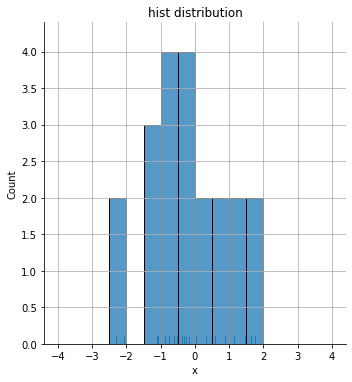

In [1]:
# 확률적 데이터
# - 정확히 예측할 수 없는 값이 나오는 데이터
# 반대로 언제 누가 얻더라도 항상 같은 값인 결정론적 데이터가 있다
# 데이터가 확률적이 되는 이유
# 여러 조건이나 상황에 따라 데이터값이 영향을 받는 경우, 측정 시에 발생하는 오차

# 분포
# 확률적 데이터에서 어떤 값이 자주 나오고 어떤 값이 드물게 나오는지를 나타내는 정보
# 범주형:count plot, 실수형:hist
import numpy as np; import seaborn as sns; import matplotlib.pyplot as plt
np.random.seed(1)
x=np.random.normal(size=21)
bins=np.linspace(-4,4,17)
sns.displot(x,rug=True,kde=False,bins=bins)
plt.title('hist distribution'); plt.xlabel('x'); plt.grid(True); plt.show()

# 기술통계
# 분포의 특징을 나타내는 여러 숫자를 계산하여 분포를 나타내는 것
# 표본평균, 표본중앙값, 표본최빈값, 표본분산, 표본표준편차, 표본왜도, 표본첨도

# 표본평균
# 일반적으로 부르는 평균. m =  bar x = (∑i=1~N xi)/N

# 표본중앙값
# 자료를 순서대로 정렬시 중앙에 위치하는 값
# N이 홀수면 (N+1)/2번째 표본값, 짝수면 N/2번째 표본값과 N/2+1번째 표본값의 평균

# 표본최빈값
# 데이터 값중 가장 빈번하게 나오는 값 - 신뢰성이 떨어짐

In [2]:
# 파이썬을 이용한 대푯값 계산
# mean():표본평균, median():표본중앙값, argmax():이산데이터의 최대값
# histogram(): 데이터를 구간으로 나누어 각 구간에 들어가는 데이터 개수 계산
print('표본평균={}, 표본중앙값={}'.format(np.mean(x),np.median(x)))
# 연속데이터에 대한 최빈값은 구간으로 나누어 최빈 구간을 구해야함
ns, _ =np.histogram(x,bins=bins)
m_bin=np.argmax(ns)
print('최빈구간={}~{}'.format(bins[m_bin],bins[m_bin+1]))

표본평균=-0.17942437649654805, 표본중앙값=-0.3224172040135075
최빈구간=-1.0~-0.5


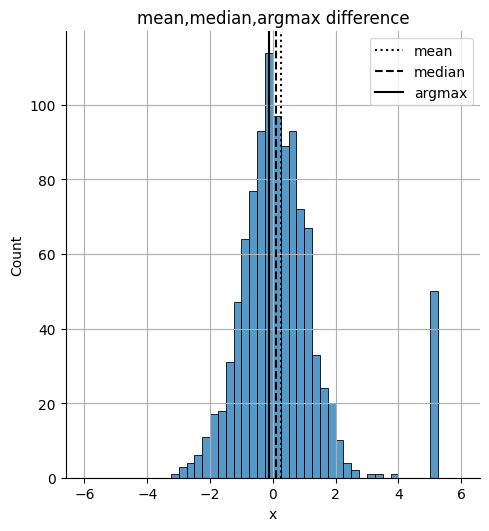

In [3]:
# 단봉분포와 다봉분포
# 단봉: 봉우리가 하나, 다봉: 봉우리가 여럿. (분포의 모양에서)

# 대칭분포
# 분포가 표본평균을 기준으로 대칭분포이면 표본중앙값=표본평균
# 분포가 대칭분포이면서 단봉분포이면 표본최빈값=표본평균
# 대칭분포를 비대칭으로 만드는 데이터를 더할 시 표본평균이 가장 큰 영향, 표본최빈값이 가장 덜 영향 받음
np.random.seed(1)
x=np.random.normal(size=1000)
x=np.hstack([x,5*np.ones(50)])
bins=np.linspace(-6,6,12*4+1)
ns,_=np.histogram(x,bins=bins)
smean=np.mean(x); smedian=np.median(x); mi=np.argmax(ns)
smode=0.5*(bins[mi]+bins[mi+1])
sns.displot(x,bins=bins)
plt.axvline(smean,c='k',ls=':',label='mean'); plt.axvline(smedian,c='k',ls='--',label='median')
plt.axvline(smode,c='k',ls='-',label='argmax')
plt.title('mean,median,argmax difference'); plt.xlabel('x')
plt.grid(True); plt.legend(); plt.show()

In [4]:
# 분산과 표준편차
# 데이터가 얼마나 변동하고 있는지를 나타내는 특징값
# 분포의 폭을 대표하는 값
# 표준편차 = sqrt(분산)
# 편향 표본분산: s^2 =(1/N)*∑i=1~N (xi−x.mean)^2 
# 비편향 표본분산: s^2 =(1/(N-1))*∑i=1~N (xi−x.mean)^2 

# 파이썬을 이용한 표본분산 및 표본표준편차의 계산
# np.var(), np.std() 편향 표본분산, 표본표준편차
# np.var( ,ddof=1), np.std( ,ddof=1) 비편향 표본분산, 표본표준편차

# 표본비대칭도
# 평균과의 거리의 세제곱을 이용하여 구하는 특징값. 0이면 분포가 대칭임.
# 음수면 mean기준 왼쪽으로 쏠린 표본이 나올 가능성이 높다는 뜻
# 계산식까지 알아야 되나 이거
# scipy.stats.skew()로 구함

# 표본 첨도
# 평균과의 거리의 네제곱을 이용하여 구하는 특징값. 데이터가 중앙에 몰려있는 정도를 비교하는데 씀
# 정규분포보다 첨도가 높으면 양수, 낮으면 음수
# scipy.stats.kurtosis()로 구함

# 표본모멘트
# k제곱을 이용해 구한 모멘트를 k차 표본모멘트라고 함
# (1/N)*∑i=1~N (x_i)^k
# 2차 이상은 (1/N)*∑i=1~N (xi−x.mean)^k 사용
# 1차=평균, 2차=분산, 3차에서 유도=비대칭도, 4차에서 유도=첨도
# scipy.stats.moment(x,k)로 구함. x는 데이터, k는 모멘트 차수

In [5]:
# 확률변수
# 확률공간의 표본을 입력으로 받아 실수로 바꾸어 출력하는 함수

# 이산확률변수
# 확률변수 값이 연속적이지 않고 떨어져있도록 정의된 경우
# 연속확률변수
# 각도처럼 연속적이고 무한대의 실수 표본값을 가지는 확률변수 구간사건의 조합으로 표시됨

# 확률변수를 사용한 데이터 분석 순서
# 1. 데이터 수집
# 2. 수집한 데이터를 확률변수의 표본 데이터라고 가정
# 3. 데이터를 사용하여 해당 확률변수의 확률분포함수 모양을 결정
# 4. 결정된 확률변수로부터 다음에 생성될 데이터나 데이터 특성 예측(회귀)

### 기댓값과 확률변수의 변환

Text(0.5, 0, 'x')

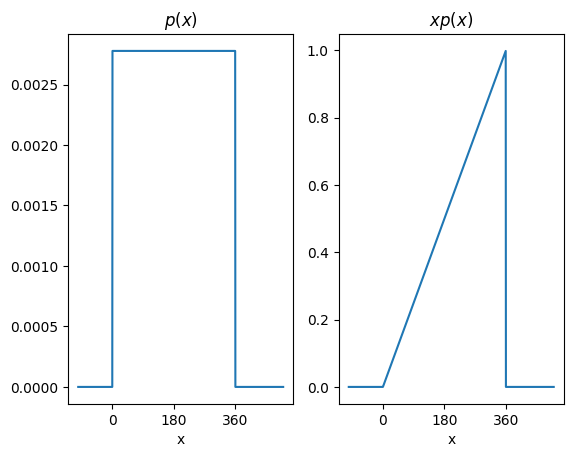

In [6]:
# 확률변수의 기댓값
# E[X]로 표기. 사실상 평균과 같음
# 이산확률변수의 기댓값은 표본공간원소 xi의 가중평균임
# μX=E[X]=∑(x_i*p(x_i))=∑xf(x)=∫xf(x)dx, x_i는 원소 p(x_i)는 확률질량함수
# 따라서 가장 확률이 높은 x값 근처의 값이 도출됨. 확률이 모여 있는 곳의 위치

x=np.linspace(-100,500,1000)
p=np.zeros_like(x)
p[(0<x)&(x<=360)]=1/360
xp=x*p
plt.subplot(121); plt.plot(x,p); plt.xticks([0,180,360])
plt.title('$p(x)$'); plt.xlabel('x')
plt.subplot(122); plt.plot(x,xp); plt.xticks([0,180,360])
plt.title('$xp(x)$'); plt.xlabel('x')
# 기댓값은 xp(x)를 적분하여 구한 면적

# 확률변수의 변환
# 기존의 확률변수를 사용해 새로운 확률변수를 만드는 것
# Y=f(X) 혹은 Z=X+Y 같은 걸 의미

# 기댓값의 성질
# 상수 c에 대해 E[c]=c
# E[cX]=cE[X]; E[X+Y]=E[X]+E[Y]; E[c1X+c2Y]=c1E[X]+c2E[Y]

In [7]:
# 통계량
# 데이터 가지고 뽑아내는 값들
# 평균,중앙값,분산 등등 전부 통계량임. 확률변수의 변환에 포함되는 개념.

# 기댓값과 표본평균의 관계
# 표본평균도 확률변수이므로 기댓값이 존재함.
# E[X.mean]=E[X]로 기댓값은 동일함

# 중앙값
# 확률변수의 중앙값은 중앙값보다 큰 값이 나올 확률과 작은 값이 나올 확률이 0.5로 같음을 의미
# 따라서 누적확률분포 F(x)에서 중앙값 계산 가능
# 0.5=F(중앙값)

# 최빈값
# 이산확률분포에서는 가장 확률 값이 큰 수.
# 연속확률분표에서는 확률밀도함수p(x)의 값이 가장 큰 확률변수의 값으로 정의
# = 확률밀도함수의 최댓값의 위치

### 분산과 표준편차

In [8]:
# 확률분포의 분산
# σ^2=Var[X]=E[(X−μ)^2] = ∑(x_i-μ)^2*p(x_i)

# 분산의 성질
# 항상 V[X] >=0, 상수 c에대해 V[c]=0, V[cX]=c^2*V[X], V[X]=E[X^2]-E[X]^2=E[X^2]-μ^2

# 두 확률변수의 합의 분산
# V[X+Y]=V[X]+V[Y]+2E[(X-μ_x)(Y-μ_y)]
# E[X+Y]=μ_x+μ_y

# 확률변수의 독립
# 두 확률변수가 가질 수 있는 모든 사건의 조합에 대해 결합서건의 확률=각 사건의 확률의 곱
# = 두 확률변수가 서로에게 영향을 미치지 않는다
# 독립이면 E[(X-μ_x)(Y-μ_y)]=0, Var[X+Y]=V[X]+V[Y]

# 표본평균의 분산
# E[x.mean]=E[X]=μ, V[μ]=(1/N)V[X]
# 따라서 표본평균을 계산한 표본 개수가 커지면 표본평균의 값의 변동성이 작아짐.
# = 표본 개수 N이 크면 표본평균 x.mean은 원래 확률변수 X의 기댓값 E[X]의 근삿값이라 할 수 있음

# 표본분산의 기대값
# E[S^2]=(N-1)/N*σ^2 즉 표본분산의 기대값이 이론분산값보다 작아짐(실제로는 무조건 작아지는것이 아닌 작아지는 경향이 있음)
# 비편향 표본분산은 1/(N-1)*∑(X_i−X.mean)^2

# 비대칭도와 첨도
# 비대칭도:μ_3/σ^3 0이면 분포가 대칭, 첨도 μ_4/σ^4

# 모멘트
# 앞선 비대칭도와 첨도를 계산하기 위한 μ_n 을 구하는 식
# μ_n = E[(X-μ)^n]=∫(x−μ)^n*p(x)dx
# n차 모멘트가 모두 같으면 두 확률분포는 같은 확률분포

### 다변수 확률변수

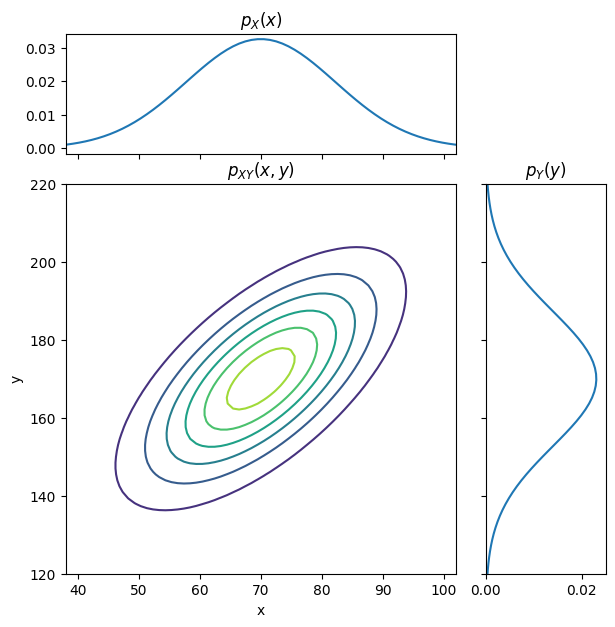

In [21]:
# 결합확률밀도함수
# X,Y처럼 복수의 확률변수를 갖는 확률밀도함수
# f(X,Y)=P[X=x,Y=y] or ∫∫f(x,y)dxdy == (∂^2*F_XY(x,y))/∂x∂y
# ∫x1~x2∫y1~y2 p_XY(x,y)dxdy=P({x1≤X≤x2,y1≤Y≤y2})

# 주변확률밀도함수
# 두 확률변수 중 하나의 확률변수 값에 대해서만 확률분포를 표시한 함수.
# p_x(x)=∑y~ f(x,y) or ∫f(x,y)dy -> y에 대하여 풀면 됨
# p_y(y)=∑x~ f(x,y) or ∫f(x,y)dx -> x에 대하여 풀면 됨
# 증명: P_x(A)=p_xy(A,A)+p_xy(A,B)+p_xy(A,C)이기 때문

# 조건부확률밀도함수
# Y의 값이 y로 주어진 경우, 즉 다변수 확률변수 중 하나의 값이 특정 값으로 고정되어 상수로 주어지는 경우
# 나머지 변수에 대한 확률질량함수를 의미함.
# f(x|y)=f(x,y)/fy(y)

# 결합누적확률분포함수
# F(x,y)=P[X<=x,Y<=y] = ∫-∞~x∫-∞~yf(u,v)dudv
# F(∞,∞)=1, F(-∞,y)=F(x,-∞)=0

import scipy as sp
from scipy.integrate import simps; from matplotlib import transforms; from matplotlib.ticker import NullFormatter
mu=[70,170]; cov=[[150,140],[140,300]]
rv=sp.stats.multivariate_normal(mu,cov)
xx=np.linspace(20,120,100); yy=np.linspace(100,250,100)
XX,YY=np.meshgrid(xx,yy); ZZ=rv.pdf(np.dstack([XX,YY]))
fx=[simps(Z,yy) for Z in ZZ.T]; fy=[simps(Z,xx) for Z in ZZ]
plt.figure(figsize=(6,6))
left,width=0.1,0.65; bottom,height=0.1,0.65; bottom_h=left_h=left+width+0.05
rect1=[left,bottom,width,height]; rect2=[left,bottom_h,width,0.2]; rect3=[left_h,bottom,0.2,height]
ax1=plt.axes(rect1); ax2=plt.axes(rect2); ax3=plt.axes(rect3)

ax2.xaxis.set_major_formatter(NullFormatter()); ax3.yaxis.set_major_formatter(NullFormatter())
ax1.contour(XX, YY, ZZ); ax1.set_title("$p_{XY}(x, y)$"); ax1.set_xlabel("x"); ax1.set_ylabel("y")
ax2.plot(xx, fx); ax2.set_title("$p_X(x)$")

base = ax3.transData; rot = transforms.Affine2D().rotate_deg(-90)
plt.plot(-yy, fy, transform=rot + base); plt.title("$p_Y(y)$")

ax1.set_xlim(38, 102); ax1.set_ylim(120, 220)
ax2.set_xlim(38, 102)
ax3.set_xlim(0, 0.025); ax3.set_ylim(120, 220)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16768\313641029.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


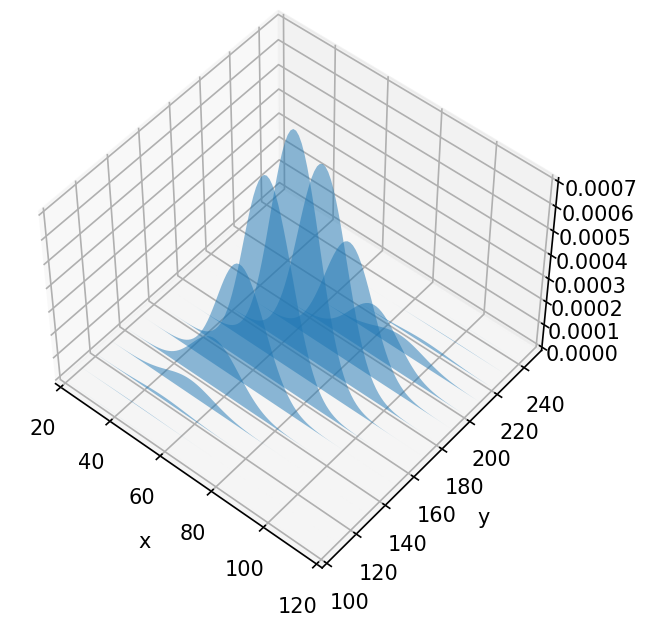

In [23]:
from matplotlib.collections import PolyCollection; from matplotlib import colors as mcolors
xx = np.linspace(20, 120, 100); yy = np.linspace(100, 250, 16)
XX, YY = np.meshgrid(xx, yy); ZZ = rv.pdf(np.dstack([XX, YY]))
fig = plt.figure(dpi=150)
ax = fig.gca(projection='3d')

xs = np.hstack([0, xx, 0])
zs = np.zeros_like(xs)
verts = []
for i, y in enumerate(yy):
    zs[1:-1] = ZZ[i]
    verts.append(list(zip(xx, zs)))

poly = PolyCollection(verts)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=yy, zdir='y')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(20, 120)
ax.set_ylim(100, 250)
ax.set_zlim3d(0, 0.0007)
ax.view_init(50, -50)
plt.show()

In [ ]:
# 독립과 상관
# 두 확률변수가 있을때, 한 확률변수의 표본값이 달라지면 다른 확률변수의 조건부 분포가 달라질때 이를 상관이라 함
# 상관 관계가 아니면 독립
# p(x,y)=p(x)p(y) 이 정의는 확률변수가 두 개 이상일때도 다 적용됨

# 반복시행
# 같은 확률변수에서 복수의 표본 데이터를 취하는 경우 이 표본들은 서로 독립인 확률변수에서 나온 표본으로 볼 수 있음
# 따라서 p(x1,x2,...,xn)=∏i=1~n p(xi)

# 조건부 확률분포
# p(x|y)=p(x,y)/p(y)=p(x)p(y)/p(y)=p(x)

# 확률변수의 기댓값 (Y=y일때)
# E[X|y]=∑xf(x|y)=∫-∞~∞ xf(x|y)dx
# 독립이면 E[XY]=E[X]E[Y], E[(X-μ_x)(Y-μ_y)]=0

# 독립 확률변수의 분산
# V[X+Y]=V[X]+V[Y]

### 공분산과 상관계수

In [24]:
# 공분산
# Cov[x,y]=(1/N)*∑(xi-x.mean)(yi-y.mean) 데이터가 1,3사분면에 있으면 양수, 2,4사분면에 있으면 음수
#         =E[(X-E[X])(Y-E[Y])] = E[XY]-E[X]E[Y]

# (피어슨)상관계수
# Corr[x,y]=Cov[x,y]/sqrt(V[X]V[Y])=ρ[X,Y]
# −1≤ρ≤1 이며 1일수록 선형상관관계 0일수록 무관계 -1일수록 선형반상관관계
# sp.stats.pearsonr(x,y)로 계산가능

# 비선형 상관관계
# 선형이 아닌 상관관계를 다루는 방법
# 비선형 상관관계시에는 피어슨 상관계수로 계산시 0으로 계산되어 정확한 값을 알 수 없음

# 앤스콤 데이터
# 개별 자료가 상관계수에 미치는 영향력이 각각 다르다는 점을 유의
# 상관계수는 비선형 상관계수를 표현하지 못하며, 상관계수가 1 혹은 0 이여도 하나의 특이값에 의해 크게 달라질 수 있음

# 다변수 확률변수의 표본공분산
# 스칼라가 아닌 벡터 표본값을 가지는 다변수 확률변수의 공분산
# X1,X2,..,XM이라는 M개의 확률변수가 있고, 이 확률변수들의 표본 데이터가 N개이면 N,M의 행렬이 되고 요소를 x_i,j로 표현가능
# 모든 조합에 대한 공분산을 한꺼번에 표기하기 위해 표본공분산행렬을 정의
# 이를 위해 진행할 순서
# 1. 각 확률변수의 표본평균을 계산 x_j.mean=(1/N)*∑i=1~N(x_i,j)
# 2. 각 확률변수의 분산을 계산    (s_j)^2=(1/N)*∑i=1~N(x_i,j-x_j.mean)^2
# 3. 두 확률변수의 공분산을 계산   s_j,k=(1/N)*∑i=1~N(x_i,j-x_j.mean)(x_i,k-x_k.mean)
# 4. x_i를 M차원 표본 벡터로 정의하면
# 표본공분산행렬 S=(1/N)*∑i=1~N(x_i-x.mean)*(x_i-x.mean).T

# 다변수 확률변수의 공분산
# X=np.array([X1,X2,..,XM])
# Cov[X]=E[(X-E[X])(X-E[X]).T]

### 조건부기댓값과 예측 문제

In [ ]:
# 조건부 기대값
# Y의 기대값을 구할때 주변확률밀도함수 fy(y)가 아닌 f(y|x)를 이용하여 계산시 조건부 기대값 혹은 조건부 평균이 됨
# Ey[Y|X]=∫ yf(y|x)dy

# 예측 문제
# X,Y 에서 X의 값을 알고 있을 때 Y의 값을 알아내는 것
# Y가 연속확률변수면 회귀분석, 이산확률변수면 분류
# 보통 조건부확률분포의 기댓값인 조건부기대값을 예측문제의 답으로 하는 경우가 많음

# 조건부기대값의 성질
# E[Y|X]가 X의 함수 = 변환 이므로 확률변수임
# Y=g(X)의 결정론적 함수값이면 E[Y|X]=E[g(X)|X]=g(X)
# E[g(X)Y|X]=g(X)E[Y|X]가 성립함

# 전체 기댓값의 법칙
# 반복하여 구한 조건부기대값의 기대값은 원래 확률변수의 기대값과 같음
# E[E[Y|X]]=E[Y]

# 조건부분산
# V[Y|X]=E[(Y-E[Y|X])^2|X]=∫(Y−E[Y|X])^2*f(y|x)dy

# 전체 분산의 법칙
# 확률변수의 분산은 조건부분산의 기대값과 조건부기대값의 분산의 합과 같음
# V[Y]=E[V[Y|X]]+V[E[Y|X]]